In [1]:
'''
Cho tập tin Diemthi_thpt_quocgia_2016.xlsx chứa bộ dữ liệu điểm thi THPT Quốc Gia năm
2016 của gần 35.000 thí sinh

Yêu cầu:
Đọc dữ liệu, xem thông tin dữ liệu
Biết danh sách các môn thi là: "Toán","Ngữ văn","Địa lí","Tiếng Anh","Sinh học","Vật lí","Hóa học","Lịch sử". 
Một thí sinh chỉ thi các môn bắt buộc chung còn các môn tự chọn có thể khác nhau.
Với dữ liệu hiện tại, cột DIEM_THI là chuỗi chứa điểm thi của tất cả các môn mà một thí sinh thi
Và như vậy thì chúng ta sẽ không phân tích được điểm thi của thí sinh. 

Do đó, việc đầu tiên là phải tiền xử lý dữ liệu. Từ dữ liệu trong cột DIEM_THI, 
hãy tạo ra các cột tương ứng với danh sách các môn thi nói trên và đưa điểm của thí sinh từ chuỗi vào các cột, 
môn nào thí sinh không thi thì sẽ để NaN.

Hãy vẽ biểu đồ phân phối tần suất điểm thi, mỗi điểm thi là một biểu đồ, 
nhận xét trên từng biểu đồ: các thống kê mô tả, phân phối chuẩn hay nghiêng? Đường cong cao hơn hay thấp hơn phân phối chuẩn… 

Lưu dữ liệu điểm thi sau khi đã chuẩn hóa để sử dụng.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read file Diemthi_thpt_quocgia_2016.xlsx into a data frame
diem_2016 = pd.read_excel('data1/Diemthi_thpt_quocgia_2016.xlsx')

In [4]:
print(diem_2016.head(),end='\n')
print()
print(diem_2016.info())

   SOBAODANH         HO_TEN   NGAY_SINH         TEN_CUMTHI GIOI_TINH  \
0  018000001  DƯƠNG VIỆT AN  12/03/1998  Sở GDĐT Bắc Giang       Nam   
1  018000002      ĐỖ VĂN AN  09/12/1998  Sở GDĐT Bắc Giang       Nam   
2  018000003     ĐỖ XUÂN AN  12/08/1997  Sở GDĐT Bắc Giang       Nam   
3  018000004   ĐẶNG PHÚC AN  19/03/1998  Sở GDĐT Bắc Giang        Nữ   
4  018000005    ĐẶNG VĂN AN  25/10/1998  Sở GDĐT Bắc Giang       Nam   

                                            DIEM_THI  
0  Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3....  
1  Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.5...  
2  Toán:   4.50   Ngữ văn:   5.50   Địa lí:   3.7...  
3  Toán:   3.00   Ngữ văn:   6.00   Địa lí:   5.5...  
4  Toán:   2.25   Ngữ văn:   4.75   Địa lí:   5.2...  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_

In [7]:
#See the first row of DIEM_THI column:
diem_2016.DIEM_THI.iloc[0] 

#Result: 'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'
#Between the subjectname 'Toan' and the score '2.00', there are three space characters " "*3

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [9]:
#Try to use .split() to split the string
print(diem_2016.DIEM_THI.iloc[0].split('   '))
#Result: ['Toán:', '2.00', 'Ngữ văn:', '5.50', 'Lịch sử:', '3.00', 'Địa lí:', '5.00']
print()

#There is a ":" after the subject name, there for use .replace(':','') in advance to remove that ":"
print(diem_2016.DIEM_THI.iloc[0].replace(':','').split(' '*3))

['Toán:', '2.00', 'Ngữ văn:', '5.50', 'Lịch sử:', '3.00', 'Địa lí:', '5.00']

['Toán', '2.00', 'Ngữ văn', '5.50', 'Lịch sử', '3.00', 'Địa lí', '5.00']


In [11]:
#Add a column DIEM_THI_list that contains splitted list of DIEM_THI string
#When using apply, pandas will pass each element of the 'DIEM_THI' column as x into lambda function
diem_2016['DIEM_THI_list'] = diem_2016['DIEM_THI'].apply(lambda x: x.replace(':','').split(' '*3))

#Drop the old DIEM_THI column
diem_2016 = diem_2016.drop('DIEM_THI', axis=1)

diem_2016.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI_list
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,"[Toán, 2.00, Ngữ văn, 5.50, Lịch sử, 3.00, Địa..."
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,"[Toán, 5.50, Ngữ văn, 5.25, Địa lí, 5.50, Tiến..."
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,"[Toán, 4.50, Ngữ văn, 5.50, Địa lí, 3.75, Tiến..."
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,"[Toán, 3.00, Ngữ văn, 6.00, Địa lí, 5.50, Tiến..."
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,"[Toán, 2.25, Ngữ văn, 4.75, Địa lí, 5.25, Tiến..."


In [13]:
#A list containing the name of all subjects
lst_mon_hoc = ['Toán', 'Ngữ văn', 'Địa lí', 'Lịch sử', 'Tiếng Anh', 'Sinh học', 'Vật lí', 'Hóa học']

#A dict to translate subject's name into English
dic_mon_hoc_Eng ={
    'Toán':'Math',
    'Ngữ văn':'Literature',
    'Địa lí':'Geography',
    'Lịch sử':'History',
    'Tiếng Anh':'English',
    'Sinh học':'Biology',
    'Vật lí':'Physics',
    'Hóa học':'Chemistry'
}

#Create function to translate subject name into English
def translate_mon_hoc (lst_diem, lst_mon_hoc):
    for mon_hoc in lst_mon_hoc:
        if mon_hoc in lst_diem:
            index_mon = lst_diem.index(mon_hoc)
            lst_diem[index_mon] = dic_mon_hoc_Eng.get(mon_hoc) #Replace the vietnames version with english one
        else: continue

diem_2016.DIEM_THI_list.apply(lambda x: translate_mon_hoc(x, lst_mon_hoc))

diem_2016.DIEM_THI_list

0        [Math, 2.00, Literature, 5.50, History, 3.00, ...
1        [Math, 5.50, Literature, 5.25, Geography, 5.50...
2        [Math, 4.50, Literature, 5.50, Geography, 3.75...
3        [Math, 3.00, Literature, 6.00, Geography, 5.50...
4        [Math, 2.25, Literature, 4.75, Geography, 5.25...
                               ...                        
34821    [Math, 0.75, Literature, 5.00, Chemistry, 4.80...
34822    [Math, 4.75, Literature, 5.75, Physics, 6.80, ...
34823    [Math, 4.00, Literature, 5.50, Physics, 5.60, ...
34824    [Math, 5.75, Literature, 6.00, Physics, 7.40, ...
34825    [Math, 2.50, Literature, 4.25, Physics, 4.20, ...
Name: DIEM_THI_list, Length: 34826, dtype: object

In [15]:
#Now try to get the index of the subject (try with Math)
lst_mon_diem = diem_2016.DIEM_THI_list.iloc[0]
print(lst_mon_diem)
vitri_Math = lst_mon_diem.index('Math')
print('Index of Math in this list:',vitri_Math)

#Get the index of the subject's score:
print('Index of Math score in this list:',vitri_Math+1)
print('Math score:',lst_mon_diem[vitri_Math+1])

['Math', '2.00', 'Literature', '5.50', 'History', '3.00', 'Geography', '5.00']
Index of Math in this list: 0
Index of Math score in this list: 1
Math score: 2.00


In [17]:
#Create a function to get the score of a subject:
def lay_diem_monhoc (score_list, subject_name):
    if subject_name in score_list: score = score_list[score_list.index(subject_name)+1]
    else: score = np.nan
    return float(score)

#Try out the function
math_score = lay_diem_monhoc(diem_2016.DIEM_THI_list.iloc[0], 'Math')
print(math_score)

chemistry_score = lay_diem_monhoc(diem_2016.DIEM_THI_list.iloc[0], 'Chemistry')
print(chemistry_score)

2.0
nan


In [19]:
#Create a list containing English subjec's names
lst_mon_hoc_eng = list(dic_mon_hoc_Eng.values())

#Add each subject as a new column containing score for each student
for mon_hoc in lst_mon_hoc_eng:
    diem_2016[mon_hoc] = diem_2016.DIEM_THI_list.apply(lambda x: lay_diem_monhoc(x, mon_hoc))

diem_2016.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI_list,Math,Literature,Geography,History,English,Biology,Physics,Chemistry
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,"[Math, 2.00, Literature, 5.50, History, 3.00, ...",2.00,5.50,5.00,3.0,NaN,NaN,NaN,NaN
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,"[Math, 5.50, Literature, 5.25, Geography, 5.50...",5.50,5.25,5.50,NaN,3.68,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,"[Math, 4.50, Literature, 5.50, Geography, 3.75...",4.50,5.50,3.75,NaN,2.25,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,"[Math, 3.00, Literature, 6.00, Geography, 5.50...",3.00,6.00,5.50,NaN,1.50,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,"[Math, 2.25, Literature, 4.75, Geography, 5.25...",2.25,4.75,5.25,NaN,2.00,NaN,NaN,NaN


In [21]:
#Remove the DIEM_THI_list column as it as no longer needed
diem_2016_new = diem_2016.drop('DIEM_THI_list', axis=1)
diem_2016_new.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,Math,Literature,Geography,History,English,Biology,Physics,Chemistry
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,2.00,5.50,5.00,3.0,NaN,NaN,NaN,NaN
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,5.50,5.25,5.50,NaN,3.68,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,4.50,5.50,3.75,NaN,2.25,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,3.00,6.00,5.50,NaN,1.50,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,2.25,4.75,5.25,NaN,2.00,NaN,NaN,NaN


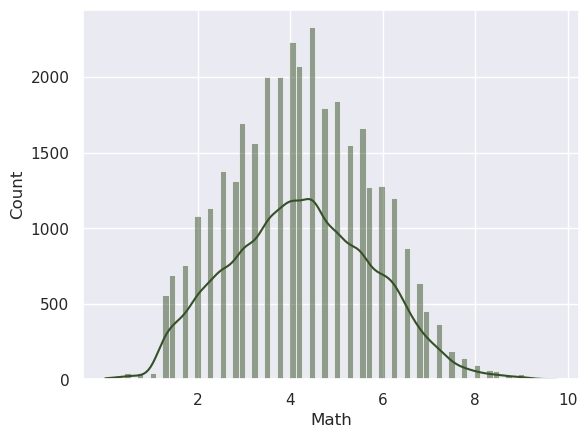


count    34500.000000
mean         4.230152
std          1.534198
min          0.000000
25%          3.000000
50%          4.250000
75%          5.250000
max          9.750000
Name: Math, dtype: float64

Skewness of Math = 0.122 > 0, Right skewed
Kurtosis of Math = -0.432 < 0, Lower than normal distribution



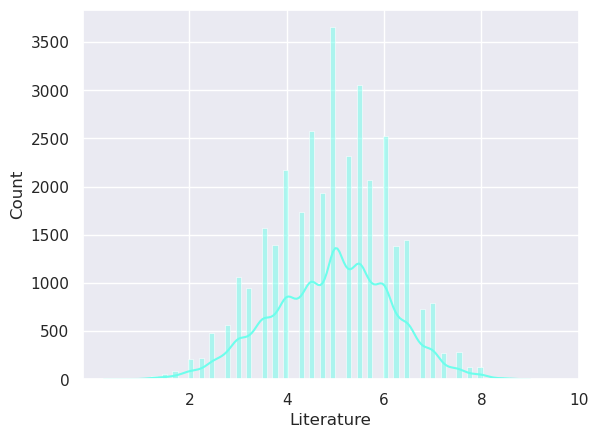


count    33894.000000
mean         4.931522
std          1.208094
min          0.250000
25%          4.000000
50%          5.000000
75%          5.750000
max          9.000000
Name: Literature, dtype: float64

Skewness of Literature = -0.157 < 0, Left skewed
Kurtosis of Literature = -0.199 < 0, Lower than normal distribution



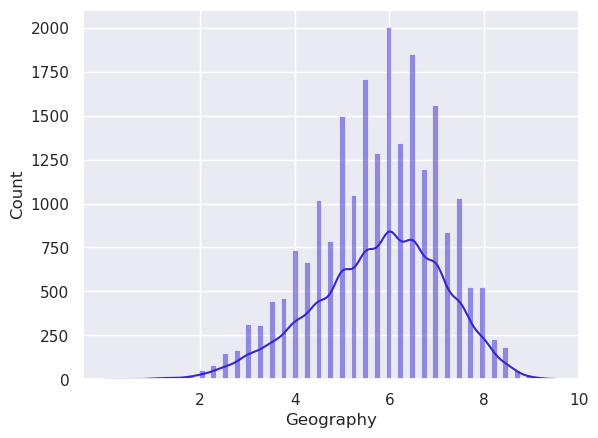


count    22171.000000
mean         5.776961
std          1.349774
min          0.000000
25%          5.000000
50%          6.000000
75%          6.750000
max          9.500000
Name: Geography, dtype: float64

Skewness of Geography = -0.383 < 0, Left skewed
Kurtosis of Geography = -0.12 < 0, Lower than normal distribution



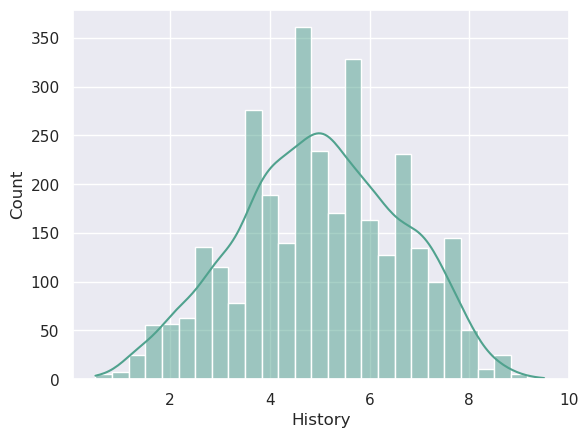


count    3235.000000
mean        4.979753
std         1.632359
min         0.500000
25%         3.750000
50%         5.000000
75%         6.250000
max         9.500000
Name: History, dtype: float64

Skewness of History = -0.091 < 0, Left skewed
Kurtosis of History = -0.522 < 0, Lower than normal distribution



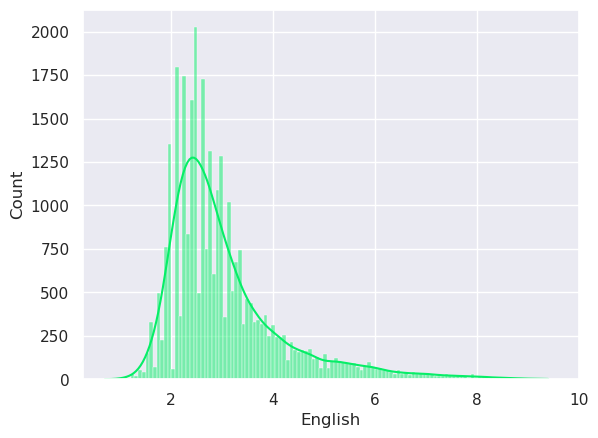


count    30200.000000
mean         3.054140
std          1.163439
min          0.700000
25%          2.300000
50%          2.750000
75%          3.430000
max          9.400000
Name: English, dtype: float64

Skewness of English = 1.806 > 0, Right skewed
Kurtosis of English = 3.98 > 0, Higher than normal distribution



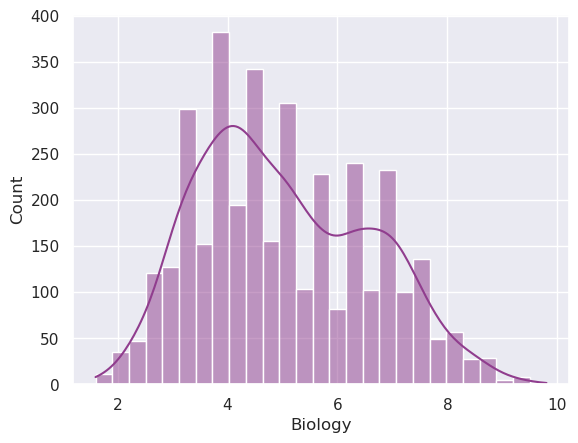


count    3571.000000
mean        5.020274
std         1.555571
min         1.600000
25%         3.800000
50%         4.800000
75%         6.200000
max         9.800000
Name: Biology, dtype: float64

Skewness of Biology = 0.349 > 0, Right skewed
Kurtosis of Biology = -0.681 < 0, Lower than normal distribution



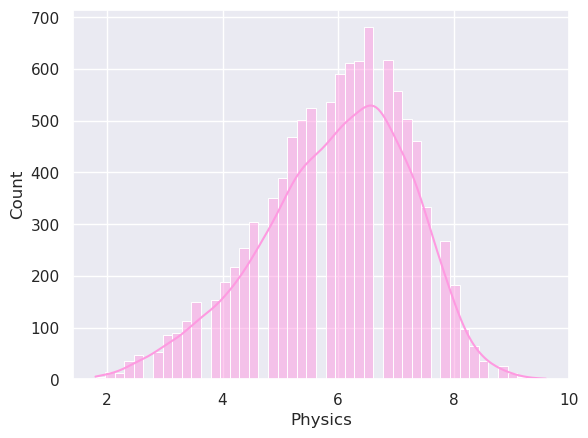


count    10157.000000
mean         5.958103
std          1.290421
min          1.800000
25%          5.200000
50%          6.000000
75%          7.000000
max          9.600000
Name: Physics, dtype: float64

Skewness of Physics = -0.446 < 0, Left skewed
Kurtosis of Physics = -0.144 < 0, Lower than normal distribution



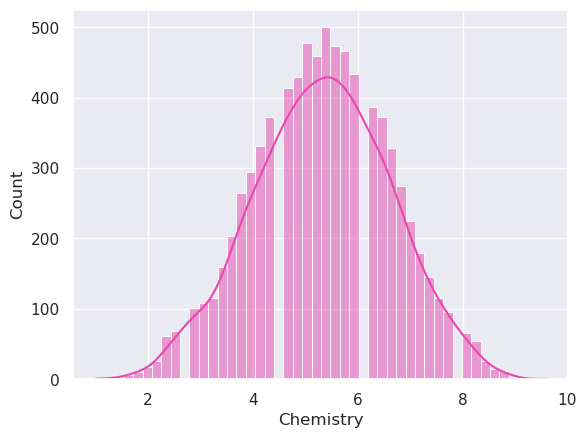


count    8097.000000
mean        5.330122
std         1.303663
min         1.000000
25%         4.400000
50%         5.400000
75%         6.200000
max         9.600000
Name: Chemistry, dtype: float64

Skewness of Chemistry = -0.06 < 0, Left skewed
Kurtosis of Chemistry = -0.278 < 0, Lower than normal distribution



In [76]:
#Draw the histogram plot for each subject accompanied with some descriptive statistics information:
import random
import scipy.stats as stats

for i in range(len(lst_mon_hoc_eng)):
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF)) #Create a random color
    sbn.set_theme(style='darkgrid')
    sbn.histplot(diem_2016_new[lst_mon_hoc_eng[i]].dropna(), kde=True, color = random_color)
    plt.xticks([2,4,6,8,10])
    plt.show()
    
    print()
    print(diem_2016_new[lst_mon_hoc_eng[i]].describe())
    
    print()
    skew = stats.skew(diem_2016_new[lst_mon_hoc_eng[i]].dropna())
    if skew >= 0: print(f'Skewness of {lst_mon_hoc_eng[i]} = {round(skew,3)} > 0, Right skewed')
    else: print(f'Skewness of {lst_mon_hoc_eng[i]} = {round(skew,3)} < 0, Left skewed')

    kurt = stats.kurtosis(diem_2016_new[lst_mon_hoc_eng[i]].dropna(), fisher=True)
    if kurt >= 0: print(f'Kurtosis of {lst_mon_hoc_eng[i]} = {round(kurt,3)} > 0, Higher than normal distribution')
    else: print(f'Kurtosis of {lst_mon_hoc_eng[i]} = {round(kurt,3)} < 0, Lower than normal distribution')
    print()
    print('='*70)